<a href="https://colab.research.google.com/github/musleho/AutoencodingExample/blob/main/Autoencoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import axis3d

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [4]:
data = make_blobs(n_samples=300, n_features=2, centers=2, cluster_std=1.0, random_state=101)

In [5]:
X, y = data

In [6]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [7]:
feat = pd.DataFrame(X)

In [8]:
feat = pd.concat([feat, z_noise], axis=1)

In [9]:
feat.columns = ['X1', 'X2', 'X3']

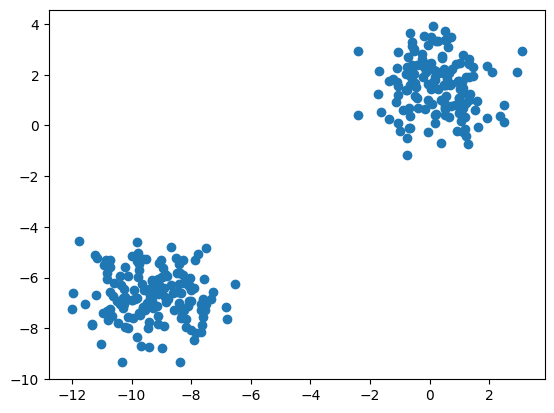

In [10]:
plt.scatter(feat['X1'], feat['X2'])

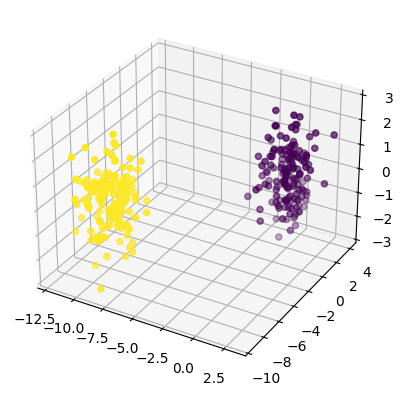

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'], feat['X2'], feat['X3'], c=y)

In [12]:
encoder = Sequential()
encoder.add(Dense(units=2, activation="relu", input_shape=[3]))

decoder = Sequential()
decoder.add(Dense(units=3, activation='relu', input_shape=[2]))

In [13]:
autoencoder = Sequential([encoder, decoder])

In [14]:
autoencoder.compile(loss='mse', optimizer=SGD(learning_rate=1.5))

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [17]:
autoencoder.fit(x=scaled_data, y=scaled_data, epochs=5)

Epoch 1/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1583
Epoch 2/5
10/10 [==============================] - 0s 1ms/step - loss: 0.0430
Epoch 3/5
10/10 [==============================] - 0s 1ms/step - loss: 0.0474
Epoch 4/5
10/10 [==============================] - 0s 1ms/step - loss: 0.0233
Epoch 5/5
10/10 [==============================] - 0s 1ms/step - loss: 0.0573


In [18]:
encoded_2d = encoder.predict(scaled_data)

10/10 [==============================] - 0s 1ms/step


In [19]:
encoded_2d

array([[0.        , 0.        ],
       [0.        , 0.7541559 ],
       [0.        , 0.6368214 ],
       [0.        , 0.        ],
       [0.02042977, 0.        ],
       [0.01804735, 0.        ],
       [0.        , 0.87492776],
       [0.        , 0.        ],
       [0.        , 0.994339  ],
       [0.        , 0.67441666],
       [0.        , 0.        ],
       [0.02011617, 0.        ],
       [0.        , 0.7985101 ],
       [0.        , 0.        ],
       [0.        , 0.90218365],
       [0.        , 0.        ],
       [0.        , 0.65348196],
       [0.        , 0.578856  ],
       [0.        , 0.3657585 ],
       [0.        , 0.70539737],
       [0.00209338, 0.        ],
       [0.        , 0.5777352 ],
       [0.        , 1.006361  ],
       [0.        , 0.        ],
       [0.01916558, 0.        ],
       [0.        , 0.7214953 ],
       [0.        , 0.6935297 ],
       [0.        , 0.767362  ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.